In [36]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

In [25]:
df4 = pd.read_csv('temperatures_nov2019_modified.csv',index_col = 'id')

In [26]:
df4[['lat', 'long']] = df4['latlng'].str.split('#', 1, expand=True)

In [27]:
df4.drop('latlng', axis=1, inplace=True)

In [28]:
df4['lat'] = pd.to_numeric(df4.lat)
df4['long'] = pd.to_numeric(df4.long)

In [8]:
geometry = [Point(xy) for xy in zip(df4['long'], df4['lat'])]
gdf = GeoDataFrame(df4, geometry=geometry)   

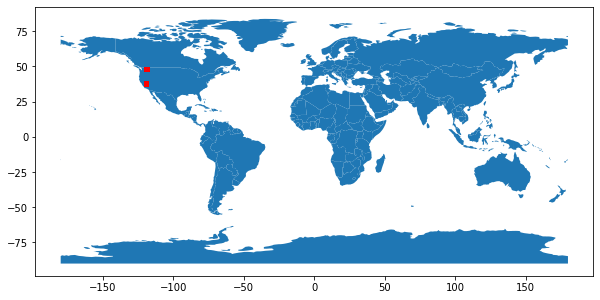

In [9]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

In [30]:
gdf = geopandas.GeoDataFrame(
    df4, geometry=geopandas.points_from_xy(df4.long, df4.lat))



In [31]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

C:\Users\rayar\anaconda3\envs\NewTry\lib\site-packages\geopandas\plotting.py:678: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


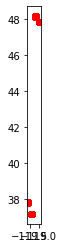

In [32]:
# We restrict to North America.
ax = world[world.continent == 'Noth America'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

plt.show()

In [33]:
usa = gpd.read_file('states.shp')

<AxesSubplot:>

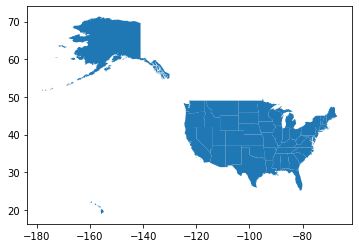

In [34]:
usa.plot()

In [43]:
usa = usa[usa.SUB_REGION == 'Pacific']

In [46]:
usa.head(50)

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497..."
1,Washington,2,53,Pacific,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
11,Oregon,12,41,Pacific,OR,"POLYGON ((-121.44151 41.99433, -122.28471 42.0..."
24,California,25,06,Pacific,CA,"MULTIPOLYGON (((-121.66522 38.16929, -121.7823..."
50,Alaska,51,02,Pacific,AK,"MULTIPOLYGON (((-161.33379 58.73325, -161.3824..."


In [47]:
usa = usa[usa.STATE_ABBR != 'AK']

In [48]:
usa = usa[usa.STATE_ABBR != 'HI']

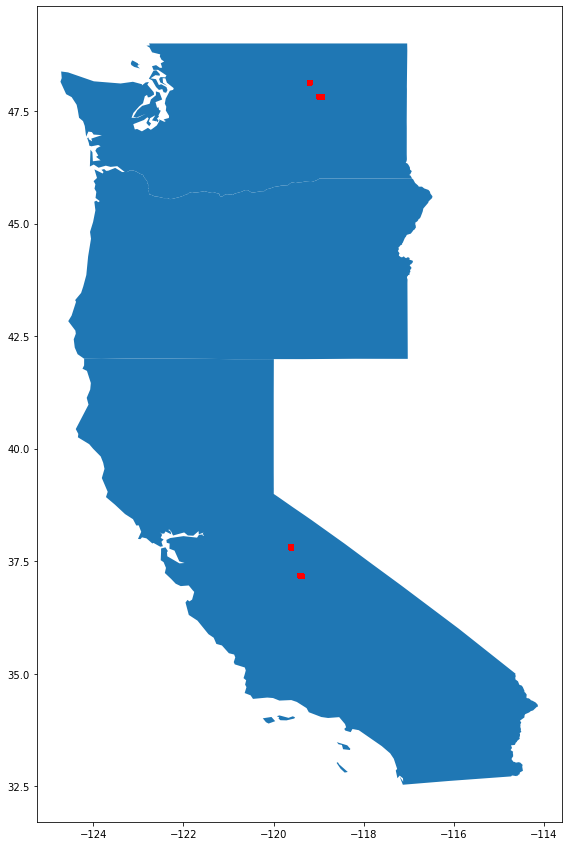

In [49]:
geometry = [Point(xy) for xy in zip(df4['long'], df4['lat'])]
gdf = GeoDataFrame(df4, geometry=geometry)   

gdf.plot(ax=usa.plot(figsize=(15, 15)), marker='o', color='red', markersize=15);